<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\hzakkam\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\hzakkam\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\hzakkam\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions, Random, Statistics

In [30]:
function sample_gaussian(μ, σ, n)
    data = rand(n)
    samples = []
    for i in data
        sample = μ + (σ * sqrt(2) * erfinv((2*i)-1))
        push!(samples,sample)
    end
    samples
end
    

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [35]:
samples = sample_gaussian(-1,2,1000)

1000-element Vector{Any}:
  0.08110637850060165
  1.1791744538916302
 -2.6915374069944606
 -0.4251080218692096
  2.645381804879913
 -0.770198664066913
  1.6644074395069546
 -3.1966951895496316
 -0.7295566385536775
 -0.7117857449867036
  2.094805032677161
 -1.6352495378086023
 -0.8131373231434608
  ⋮
  2.8343522070292195
 -1.5546194046407331
  0.4178104742335176
 -0.8287173591208845
 -0.9177458950630233
  0.04285742638756784
  3.133627651467548
 -1.7231305837848254
 -1.0890343863851748
  2.629533922491595
 -2.208526410856111
  0.9475773873165823

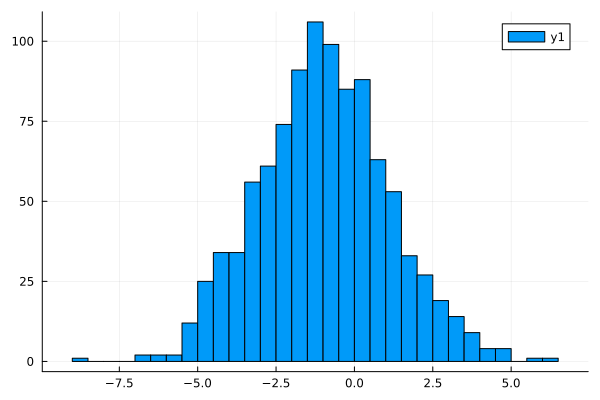

In [36]:
using Plots
histogram(samples)

In [37]:
using Distributions
x = -8:0.001:6
pdf_gaussian= pdf.(Normal(-1,2),x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

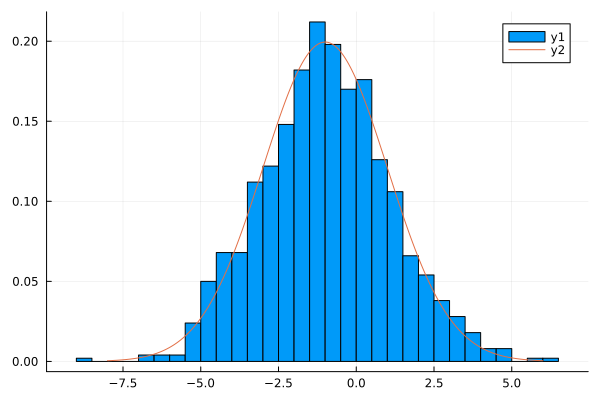

In [38]:
histogram(samples, normalize=true)
plot!(x,pdf_gaussian)